# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [1]:
#Import your libraries here
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import hdbscan
from matplotlib.pyplot import figure


In [2]:
#Load the dataset and explore its variables

df = pd.read_csv('snsdata.csv')
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [3]:
#Your code here:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [4]:
df.isnull().mean().sort_values(ascending = False)

age             0.169533
gender          0.090800
drugs           0.000000
cheerleading    0.000000
hot             0.000000
sexy            0.000000
sex             0.000000
cute            0.000000
sports          0.000000
tennis          0.000000
baseball        0.000000
swimming        0.000000
drunk           0.000000
volleyball      0.000000
softball        0.000000
soccer          0.000000
football        0.000000
basketball      0.000000
friends         0.000000
kissed          0.000000
dance           0.000000
band            0.000000
blonde          0.000000
death           0.000000
die             0.000000
abercrombie     0.000000
hollister       0.000000
clothes         0.000000
shopping        0.000000
mall            0.000000
dress           0.000000
marching        0.000000
hair            0.000000
bible           0.000000
jesus           0.000000
church          0.000000
god             0.000000
rock            0.000000
music           0.000000
gradyear        0.000000


In [5]:
def fill_age(x):
    if x == None:
        if df['gradyear'] == 2006:
            return df[df['gradyear']==2006]['age'].mean()
        elif df['gradyear'] == 2007:
            return df[df['gradyear']==2007]['age'].mean()
        elif df['gradyear'] == 2008:
            return df[df['gradyear']==2008]['age'].mean()
        elif df['gradyear'] == 2009:
            return df[df['gradyear']==2009]['age'].mean()
    else:
        return x

In [6]:
df['age'] = df['age'].fillna(df['age'].mean())
df['age'] = df['age'].apply(lambda x: math.floor(x))

In [7]:
#Your code here:
df['gender'].fillna(value = 'F', inplace = True)

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

In [8]:
#sns.pairplot(df)

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [9]:
# Outliers 
q1 = np.percentile(df['age'],25)
q3 = np.percentile(df['age'],75)
iqr = q3-q1
iqr
def outliers (x):
    if (x > q3+(iqr*1.5)) or (x < q1-(iqr*1.5)):
        return 'outlier'
    else:
        return(x)

In [10]:
#Your code here:
df2 = df.copy()
df2['gender'] = pd.get_dummies(df['gender'])
df2

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,18,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1,18,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,0,18,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,1,18,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,0,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,0,15,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,0,15,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,0,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Outliers
df2['age'] = df['age'].apply(outliers)
df2['age'] = df2['age'].replace('outlier', math.floor(df['age'].mean()))

In [12]:
cols = df.columns.drop('gender')

In [13]:
scaler = preprocessing.StandardScaler()
scaler.fit(df2[cols])
df2[cols] = scaler.transform(df2[cols])


In [14]:
df2

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-1.341641,0,1.084710,-0.634528,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,-1.341641,1,1.084710,-0.826150,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,-1.341641,0,1.084710,1.062695,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,-1.341641,1,1.084710,-0.826150,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,-1.341641,1,1.084710,-0.552404,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.341641,0,-0.741760,-0.826150,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,1.341641,0,-1.654995,-0.798775,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,1.341641,0,-1.654995,-0.826150,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,1.341641,0,-0.741760,-0.826150,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

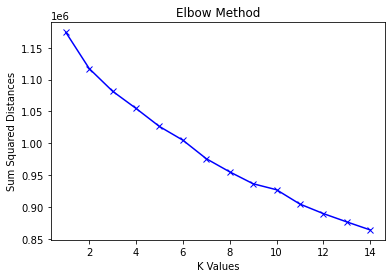

In [23]:
# Creo un rango d valores para ver cual es mi numero optimo d clusters
K = range(1,15)
sum_square_distances = []

# para cada num en mi rango
for k in K:
    # Creo mi modelo con n clusters
    model = KMeans(n_clusters = k).fit(df2)
    #ponemos en una lista las squared distances
    # squared distances es la distancia de cada punto del cluster a su centro elevada al cuadrado
    # usamos el numero donde vemos q se "optimiza"
    sum_square_distances.append(model.inertia_)
# Plotea en x el num d clusters, en y sus distancias
plt.plot(K, sum_square_distances, 'bx-')
plt.xlabel('K Values')
plt.ylabel('Sum Squared Distances')
plt.ylabel("Sum Squared Distances")
plt.title("Elbow Method")
plt.show()

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

In [19]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,12))
visualizer.fit(df2)
visualizer.poof();

KeyboardInterrupt: 

In [ ]:
model = hdbscan.HDBSCAN()
visualizer = KElbowVisualizer(model, k=(3,12))
visualizer.fit(df2)
visualizer.poof();

In [29]:
#Your code here:
km = KMeans(n_clusters=8).fit(df2)
preds = km.fit_predict(df2)
df2['cluster'] = preds

In [30]:
df2['cluster'].value_counts()

2    11627
1    10454
5     3709
7     1859
0      932
4      863
3      555
6        1
Name: cluster, dtype: int64

In [ ]:
df2.groupby('cluster').mean()

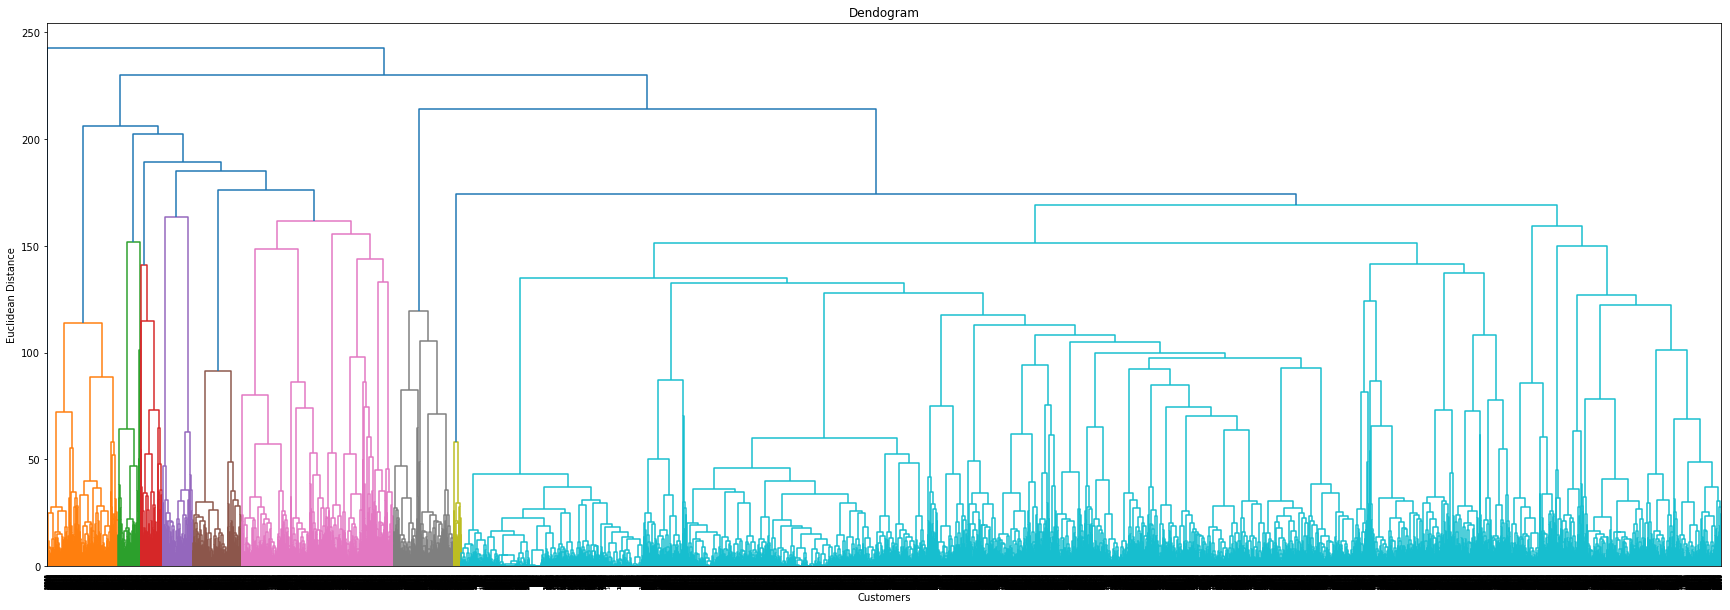

In [36]:
figure(figsize=(30,10))
dendogram = sch.dendrogram(sch.linkage(df2.drop('cluster', axis = 1), method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
clusteres = hdbscan.HDBSCAN(min_cluster_size = 10, gen_min_span_tree = True)
clusteres.fit(df2.drop('cluster', axis = 1))

In [ ]:
# Los circulos son nuestros clusters
figure(figsize=(30,10))
clusteres.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [ ]:
df2['cluster2'] = clusteres.labels_
df2['cluster2'].value_counts()